<a href="https://colab.research.google.com/github/EsraaMosaad/TECHNOHACKS-EDUTECH/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
!pip install imbalanced-learn

In [10]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [14]:
data=pd.read_csv('/content/creditcard.csv')

In [15]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
x_data=data.drop(['Class'],axis=1)
y_data=data['Class']

# **Class distribution**

In [17]:
from matplotlib.pyplot import plot

In [18]:
y_data.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: ylabel='Class'>

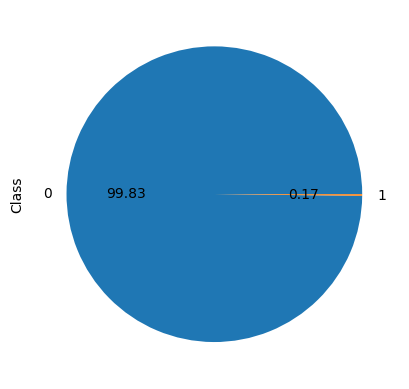

In [19]:
y_data.value_counts().plot.pie(autopct='%.2f')

# **Random Undersampling**
Here we are going to reduce the size of majority class " class 1" and be same as minority class " class 0"

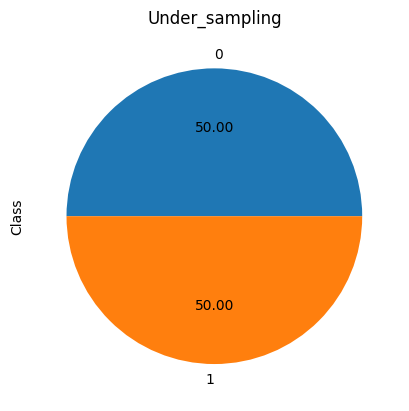

In [30]:
from imblearn.under_sampling import RandomUnderSampler


rus=RandomUnderSampler(sampling_strategy=1)

x_res_under,y_res_under=rus.fit_resample(x_data,y_data)

ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title('Under_sampling')

In [31]:
y_res_under.value_counts()

0    492
1    492
Name: Class, dtype: int64

# **Random Oversampling**
Here we are going to incrase minority class "0" to equal majority class "1"

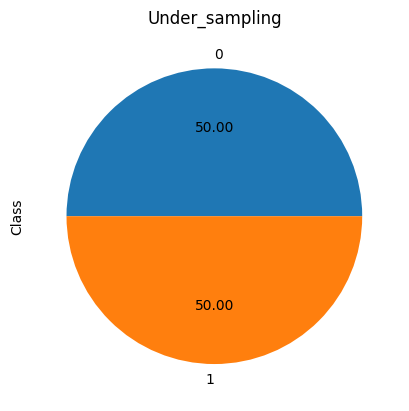

In [22]:
from imblearn.over_sampling import RandomOverSampler


ros=RandomOverSampler(sampling_strategy='not majority')

x_res,y_res=ros.fit_resample(x_data,y_data)

ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title('Under_sampling')

In [23]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# **Build a model (ANN) in tensorflow/keras**

In [24]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


In [25]:
from tensorflow_addons import losses

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=15, stratify=y_res)
y_train.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [28]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=30, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=50, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [29]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/50
14216/14216 [==============================] - 71s 4ms/step - loss: 26.2323 - accuracy: 0.7872
Epoch 2/50
14216/14216 [==============================] - 50s 3ms/step - loss: 10.5507 - accuracy: 0.8868
Epoch 3/50
14216/14216 [==============================] - 51s 4ms/step - loss: 6.9204 - accuracy: 0.9040
Epoch 4/50
14216/14216 [==============================] - 51s 4ms/step - loss: 4.6908 - accuracy: 0.9104
Epoch 5/50
14216/14216 [==============================] - 52s 4ms/step - loss: 2.1618 - accuracy: 0.9150
Epoch 6/50
14216/14216 [==============================] - 51s 4ms/step - loss: 0.8671 - accuracy: 0.9207
Epoch 7/50
14216/14216 [==============================] - 50s 4ms/step - loss: 0.3045 - accuracy: 0.9303
Epoch 8/50
14216/14216 [==============================] - 52s 4ms/step - loss: 0.1782 - accuracy: 0.9360
Epoch 9/50
14216/14216 [==============================] - 50s 4ms/step - loss: 0.1678 - accuracy: 0.9394
Epoch 10/50
14216/14216 [============================

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_res_under, y_res_under, test_size=0.2, random_state=15, stratify=y_res_under)
y_train.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [33]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
25/25 [==============================] - 2s 6ms/step - loss: 1992.3591 - accuracy: 0.4676
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 164.3797 - accuracy: 0.4765
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 35.9866 - accuracy: 0.5349
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 31.9386 - accuracy: 0.5146
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 15.5891 - accuracy: 0.5565
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 24.7619 - accuracy: 0.5959
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 44.4303 - accuracy: 0.5235
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 46.2533 - accuracy: 0.5515
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 38.7638 - accuracy: 0.6036
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 28.1350 - accuracy: 0.5540
Epoch 